In [5]:
#A1
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
# Load the data from the CSV file
data = np.genfromtxt("D:\extracted_features_charrec_dense7.csv", delimiter=',')

# Separate the features and labels
X = data[:, :-1]
y = data[:, -1]

# Training data for AND gate
# AND gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs)

# Print the trained weights
print("Trained Weights:")
print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, data):
    correct = 0
    for i in range(len(data)):
        x1, x2 = data[i]
        target = targets[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")
    accuracy = (correct / len(data)) * 100
    print(f"Accuracy: {accuracy}%")

# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, inputs)


Trained Weights:
W0: 1.6999999999999933, W1: -1.6000000000000008, W2: -1.6000000000000005

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 0
Accuracy: 0.0%


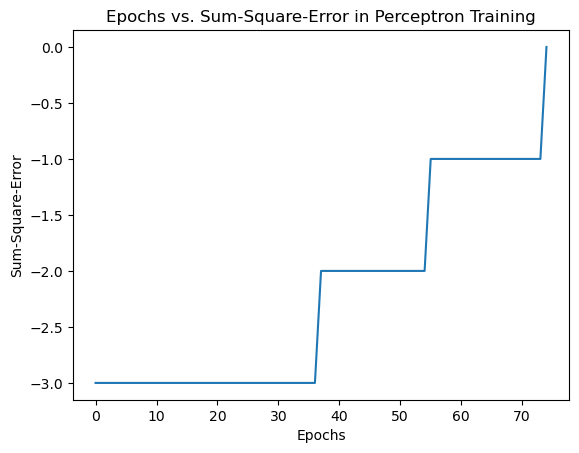

In [9]:
# Plot epochs against error values
plt.plot(range(len(error_values)), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.title('Epochs vs. Sum-Square-Error in Perceptron Training')
plt.show()

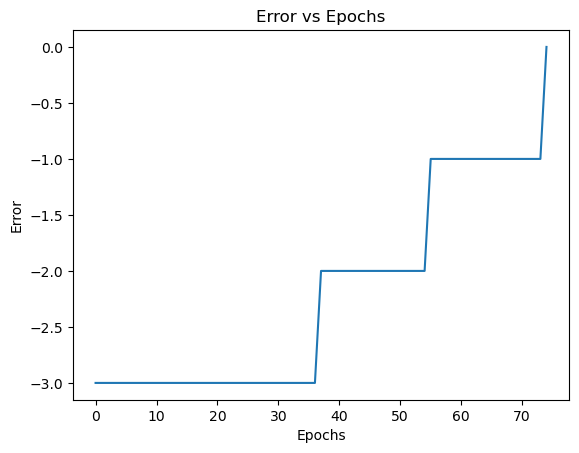

In [10]:
import matplotlib.pyplot as plt

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs)

# Plot the errors
plt.plot(range(len(error_values)), error_values)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs Epochs')
plt.show()


Training with Bi-Polar Step Activation Function:
Trained Weights:
W0: 0.40000000000000246, W1: 0.199999999999999, W2: -0.34999999999999354

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 1
Accuracy: 25.0%
Number of Iterations to Converge: 100


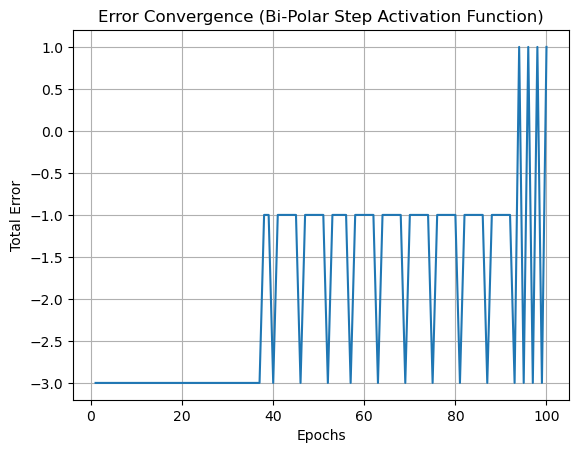


Training with Sigmoid Activation Function:
Trained Weights:
W0: 0.8081759012184128, W1: -0.9991447406092019, W2: -1.482838676567676

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 0
Input: (1, 0), Target: 0, Prediction: 0
Input: (1, 1), Target: 1, Prediction: 0
Accuracy: 50.0%
Number of Iterations to Converge: 100


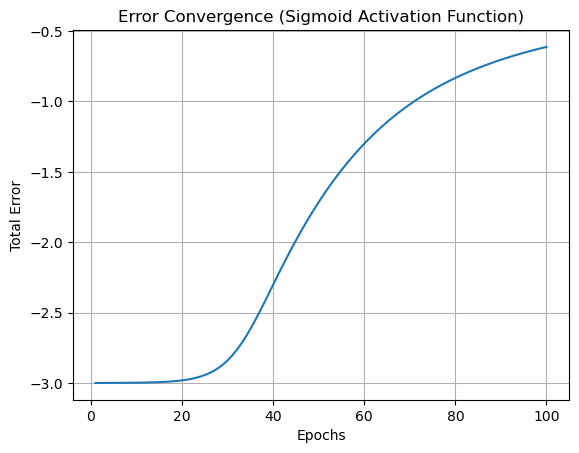


Training with ReLU Activation Function:
Trained Weights:
W0: 0.023949644070226525, W1: 0.30519784086549756, W2: 0.2794981904241313

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 0, Prediction: 1
Input: (1, 0), Target: 0, Prediction: 1
Input: (1, 1), Target: 1, Prediction: 1
Accuracy: 25.0%
Number of Iterations to Converge: 100


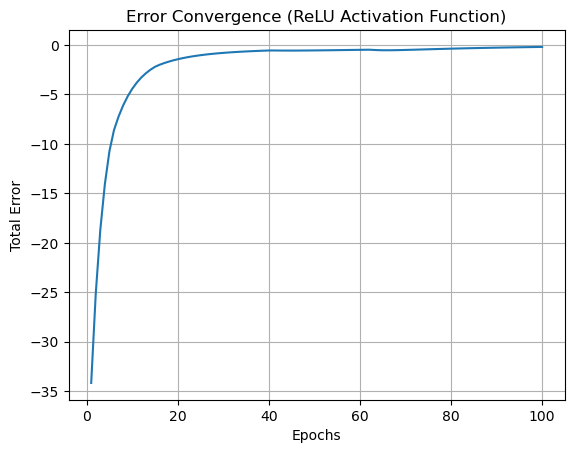

In [11]:
#A2
import numpy as np

# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Training data for AND gate
# AND gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Activation functions
def bi_polar_step_activation(sum):
    return -1 if sum < 0 else 1

def sigmoid_activation(sum):
    return 1 / (1 + np.exp(-sum))

def relu_activation(sum):
    return max(0, sum)

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data, activation_fn):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Apply the selected activation function
            activated_sum = activation_fn(weighted_sum)
            # Calculate the error
            error = target - activated_sum
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Test different activation functions and compare iterations
activation_functions = [("Bi-Polar Step", bi_polar_step_activation),
                        ("Sigmoid", sigmoid_activation),
                        ("ReLU", relu_activation)]

for activation_name, activation_fn in activation_functions:
    print(f"\nTraining with {activation_name} Activation Function:")
    trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs, activation_fn)
    print("Trained Weights:")
    print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

    print("\nTesting the Trained Perceptron:")
    test_perceptron(trained_weights, inputs)
    print(f"Number of Iterations to Converge: {len(error_values)}")

    import matplotlib.pyplot as plt
    plt.plot(range(1, len(error_values) + 1), error_values)
    plt.xlabel('Epochs')
    plt.ylabel('Total Error')
    plt.title(f'Error Convergence ({activation_name} Activation Function)')
    plt.grid(True)
    plt.show()


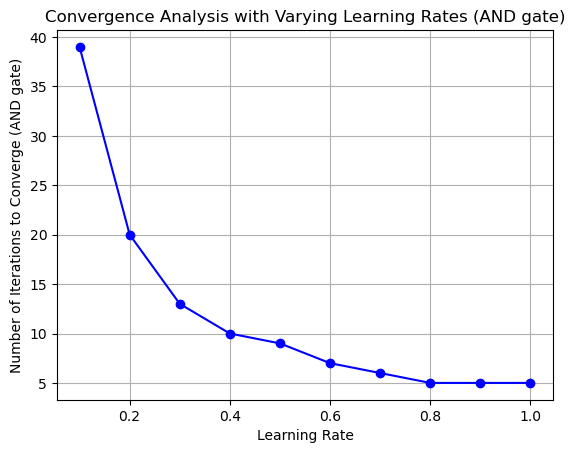

In [15]:
"A3"
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights
W0 = 10
W1 = 0.2
W2 = -0.75

# Training data for AND gate
# AND gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

# Define the activation function (step function for an AND gate)
def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function for AND gate
def train_perceptron(weights, learning_rate, max_epochs, data, targets):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        
        errors.append(total_error)
        if total_error == 0:
            break
    
    return errors

# Varying learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iteration_counts = []

for lr in learning_rates:
    # Clone the initial weights to keep them the same for each learning rate
    weights = [W0, W1, W2]
    
    # Train the perceptron for AND gate and collect errors
    error_values = train_perceptron(weights, lr, 100, inputs, targets)
    iteration_counts.append(len(error_values))

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iteration_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge (AND gate)')
plt.title('Convergence Analysis with Varying Learning Rates (AND gate)')
plt.grid(True)
plt.show()


Testing the Trained Perceptron for XOR Gate:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 0
Input: (1, 0), Target: 1, Prediction: 0
Input: (1, 1), Target: 0, Prediction: 0
Accuracy: 25.00%


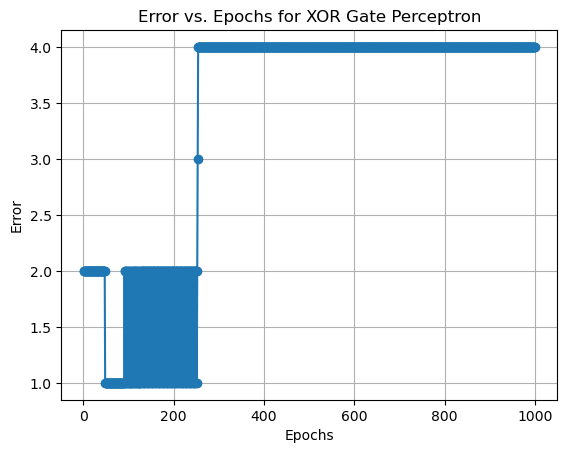

In [19]:
"A4"#A1

import numpy as np
import matplotlib.pyplot as plt

# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# XOR gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

# Define the activation function (step function)
def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function for XOR gate
def train_perceptron(weights, learning_rate, max_epochs, data, targets, convergence_error=0.002):
    error_history = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            
            # Calculate the error
            error = target - activate(weighted_sum)
            
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
            
            # Accumulate the error
            total_error += error ** 2
        
        error_history.append(total_error)
        
        # Check for convergence
        if total_error <= convergence_error:
            break
    
    return weights, error_history

# Initialize weights
weights = [W0, W1, W2]

# Train the perceptron for XOR gate
trained_weights, error_history = train_perceptron(weights, learning_rate, 1000, inputs, targets)

# Test the trained perceptron for XOR gate
def test_perceptron(weights, data, targets):
    correct = 0
    total = len(data)
    for i in range(total):
        x1, x2 = data[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == targets[i]:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {targets[i]}, Prediction: {prediction}")

    accuracy = (correct / total) * 100
    print(f"Accuracy: {accuracy:.2f}%")

# Test the trained perceptron for XOR gate
print("Testing the Trained Perceptron for XOR Gate:")
test_perceptron(trained_weights, inputs, targets)

# Plot the epochs against error values
plt.plot(range(1, len(error_history) + 1), error_history, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs for XOR Gate Perceptron')
plt.grid(True)
plt.show()


Training and Testing with Step Activation Function:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 0
Input: (1, 0), Target: 1, Prediction: 0
Input: (1, 1), Target: 0, Prediction: 0
Accuracy: 25.00%
Iterations taken to converge: 1000



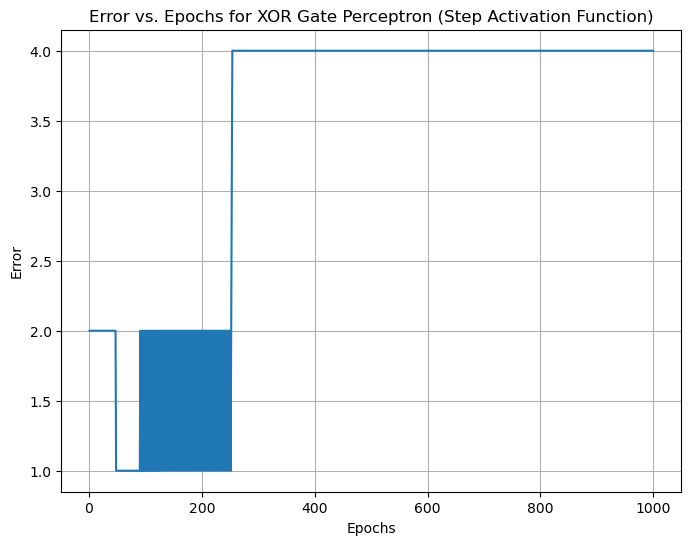

Training and Testing with Bi-Polar Step Activation Function:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 0
Accuracy: 75.00%
Iterations taken to converge: 1000



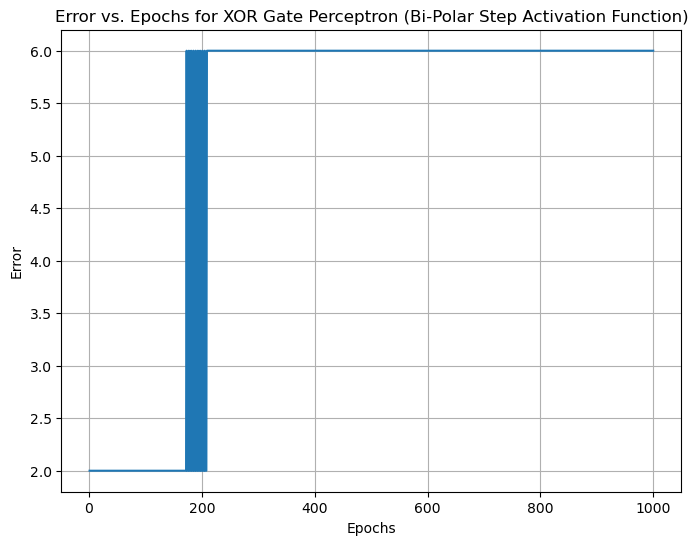

Training and Testing with Sigmoid Activation Function:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 0
Input: (1, 1), Target: 0, Prediction: 0
Accuracy: 50.00%
Iterations taken to converge: 1000



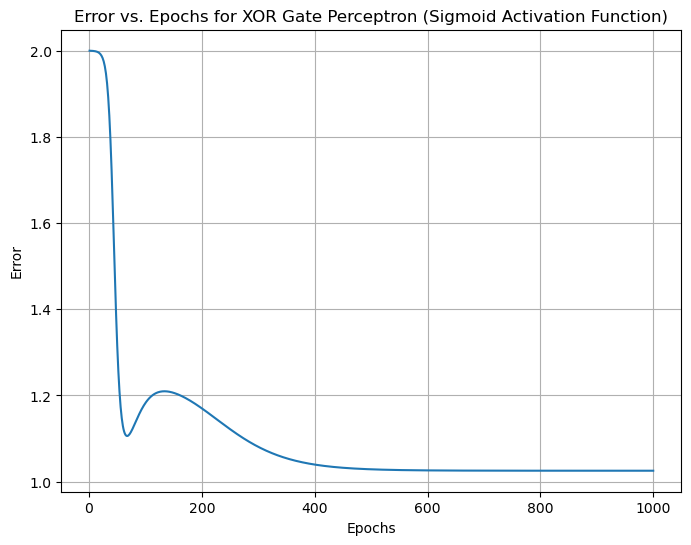

Training and Testing with ReLU Activation Function:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 1
Accuracy: 50.00%
Iterations taken to converge: 1000



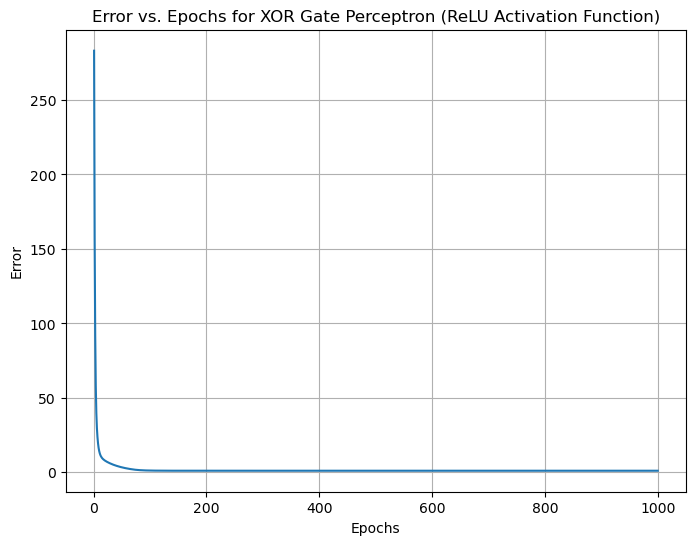

In [27]:
"A4"#A2
# Modify the test_perceptron() function
def test_perceptron(weights, data):
    correct = 0
    total = len(data)
    for i in range(total):
        x1, x2 = data[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate_step(weighted_sum)  # Use the step function for testing
        if prediction == targets[i]:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {targets[i]}, Prediction: {prediction}")

    accuracy = (correct / total) * 100
    print(f"Accuracy: {accuracy:.2f}%")

# Function to train and test the perceptron with a given activation function
def train_test_perceptron(activation_function, activation_name):
    weights = np.array(initial_weights)
    trained_weights, error_history = train_perceptron(weights, learning_rate, 1000, inputs, targets, activation_function)
    
    print(f"Training and Testing with {activation_name} Activation Function:")
    test_perceptron(trained_weights, inputs)
    print(f"Iterations taken to converge: {len(error_history)}")
    print()
    
    # Plot error vs. epochs
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(error_history) + 1), error_history)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title(f'Error vs. Epochs for XOR Gate Perceptron ({activation_name} Activation Function)')
    plt.grid(True)
    plt.show()

# Train and test the perceptron with different activation functions separately
for activation_function, activation_name in zip(activation_functions, activation_names):
    train_test_perceptron(activation_function, activation_name)


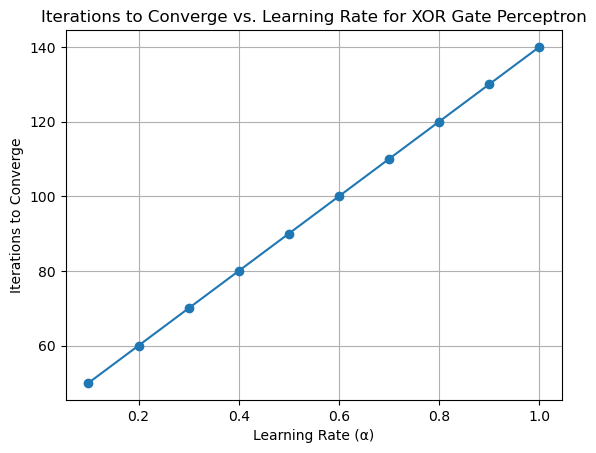

In [29]:
"A4"#A3
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights
W0 = 10
W1 = 0.2
W2 = -0.75

# Initial learning rate (α)
initial_learning_rate = 0.05

# XOR gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

# Define the activation function (step function)
def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function for XOR gate
def train_perceptron(weights, learning_rate, max_epochs, data, targets, convergence_error=0.002):
    error_history = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            
            # Calculate the error
            error = target - activate(weighted_sum)
            
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
            
            # Accumulate the error
            total_error += error ** 2
        
        error_history.append(total_error)
        
        # Check for convergence
        if total_error <= convergence_error:
            break
    
    return weights, error_history

# Initialize weights (3 weights for XOR gate + bias)
initial_weights = [W0, W1, W2]

# List of learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# List of maximum number of epochs corresponding to each learning rate
max_epochs_list = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]

# Store the number of iterations taken for convergence for each learning rate
iterations_to_converge = []

# Train the perceptron for different learning rates and record iterations
for learning_rate, max_epochs in zip(learning_rates, max_epochs_list):
    weights = np.array(initial_weights)
    _, error_history = train_perceptron(weights, learning_rate, max_epochs, inputs, targets)
    iterations_to_converge.append(len(error_history))

# Plot learning rate vs. iterations to converge
plt.plot(learning_rates, iterations_to_converge, marker='o', linestyle='-')
plt.xlabel('Learning Rate (α)')
plt.ylabel('Iterations to Converge')
plt.title('Iterations to Converge vs. Learning Rate for XOR Gate Perceptron')
plt.grid(True)
plt.show()


In [ ]:
"A5"

In [ ]:
"A6"

In [1]:
"A7"
import numpy as np

# Initialize parameters
np.random.seed(0)
w1 = np.random.uniform(-1, 1)
w2 = np.random.uniform(-1, 1)
b1 = np.random.uniform(-1, 1)
w3 = np.random.uniform(-1, 1)
b2 = np.random.uniform(-1, 1)
alpha = 0.05

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Training data for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_output = np.array([0, 0, 0, 1])

# Training loop
for iteration in range(1000):
    total_error = 0
    for i in range(len(X)):
        # Forward propagation
        z1 = w1 * X[i][0] + w2 * X[i][1] + b1
        a1 = sigmoid(z1)
        z2 = w3 * a1 + b2
        a2 = sigmoid(z2)

        # Calculate error
        E = target_output[i] - a2
        total_error += E

        # Backpropagation
        delta2 = E * a2 * (1 - a2)
        w3 = w3 + alpha * delta2 * a1
        b2 = b2 + alpha * delta2
        delta1 = delta2 * w3 * a1 * (1 - a1)
        w1 = w1 + alpha * delta1 * X[i][0]
        w2 = w2 + alpha * delta1 * X[i][1]
        b1 = b1 + alpha * delta1

    # Check for convergence
    if abs(total_error) <= 0.002:
        print(f"Converged after {iteration + 1} iterations")
        break

# Test the trained network
for i in range(len(X)):
    z1 = w1 * X[i][0] + w2 * X[i][1] + b1
    a1 = sigmoid(z1)
    z2 = w3 * a1 + b2
    a2 = sigmoid(z2)
    print(f"Input: {X[i]}, Output: {a2}")


Input: [0 0], Output: 0.25420372341296715
Input: [0 1], Output: 0.2540136059504077
Input: [1 0], Output: 0.2542143503230592
Input: [1 1], Output: 0.25402361321599626


In [2]:
"A8"
import numpy as np

# Initialize parameters
np.random.seed(0)
input_size = 2
hidden_size = 4
output_size = 1
alpha = 0.05

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Training data for the XOR gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_output = np.array([[0], [1], [1], [0]])

# Initialize weights and biases
input_layer = np.random.uniform(-1, 1, (input_size, hidden_size))
output_layer = np.random.uniform(-1, 1, (hidden_size, output_size))
hidden_layer_bias = np.random.uniform(-1, 1, (1, hidden_size))
output_layer_bias = np.random.uniform(-1, 1, (1, output_size))

# Training loop
for iteration in range(10000):
    # Forward propagation
    hidden_layer_input = np.dot(X, input_layer) + hidden_layer_bias
    hidden_layer_output = sigmoid(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, output_layer) + output_layer_bias
    output_layer_output = sigmoid(output_layer_input)

    # Calculate error
    error = target_output - output_layer_output

    # Backpropagation
    d_output_layer = error * sigmoid_derivative(output_layer_output)
    error_hidden_layer = d_output_layer.dot(output_layer.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    output_layer += hidden_layer_output.T.dot(d_output_layer) * alpha
    output_layer_bias += np.sum(d_output_layer, axis=0, keepdims=True) * alpha
    input_layer += X.T.dot(d_hidden_layer) * alpha
    hidden_layer_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * alpha

    # Check for convergence
    if np.mean(np.abs(error)) <= 0.002:
        print(f"Converged after {iteration + 1} iterations")
        break

# Test the trained network
hidden_layer_output = sigmoid(np.dot(X, input_layer) + hidden_layer_bias)
output_layer_output = sigmoid(np.dot(hidden_layer_output, output_layer) + output_layer_bias)
for i in range(len(X)):
    print(f"Input: {X[i]}, Output: {output_layer_output[i][0]}")


Input: [0 0], Output: 0.2212663891080304
Input: [0 1], Output: 0.795232937336027
Input: [1 0], Output: 0.8265392468595947
Input: [1 1], Output: 0.17938736148804058


In [3]:
"A9"

import numpy as np

class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.05):
        self.weights = np.random.randn(num_inputs)
        self.learning_rate = learning_rate

    def forward_propagate(self, inputs):
        weighted_sum = np.dot(inputs, self.weights)
        output = 1 / (1 + np.exp(-weighted_sum))  # Use sigmoid activation
        return output

    def backpropagate(self, inputs, target_output, actual_output):
        error = target_output - actual_output
        delta = error * actual_output * (1 - actual_output)
        self.weights += self.learning_rate * delta * inputs

    def train(self, training_examples, num_epochs=100):
        for epoch in range(num_epochs):
            for inputs, target_output in training_examples:
                actual_output = self.forward_propagate(inputs)
                self.backpropagate(inputs, target_output, actual_output)

    def predict(self, inputs):
        return self.forward_propagate(inputs)

class LogicGate:
    def __init__(self, num_inputs, gate_name):
        self.num_inputs = num_inputs
        self.gate_name = gate_name
        self.perceptron = Perceptron(num_inputs)

    def train(self, training_data, num_epochs=100):
        self.perceptron.train(training_data, num_epochs)

    def test(self, test_data):
        for inputs, target_output in test_data:
            output = self.perceptron.predict(inputs)
            print(f"{self.gate_name} Gate: Input: {inputs}, Output: {output}")

# Create a training dataset for AND
training_and = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 0),
    (np.array([1, 0]), 0),
    (np.array([1, 1]), 1)
]

# Create a training dataset for XOR
training_xor = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 1),
    (np.array([1, 0]), 1),
    (np.array([1, 1]), 0)
]

# Create logic gates
and_gate = LogicGate(2, "AND")
xor_gate = LogicGate(2, "XOR")

# Train and test the AND gate
and_gate.train(training_and)
and_gate.test(training_and)

# Train and test the XOR gate
xor_gate.train(training_xor)
xor_gate.test(training_xor)


AND Gate: Input: [0 0], Output: 0.5
AND Gate: Input: [0 1], Output: 0.5604805460165903
AND Gate: Input: [1 0], Output: 0.5407311337902764
AND Gate: Input: [1 1], Output: 0.6002240951414356
XOR Gate: Input: [0 0], Output: 0.5
XOR Gate: Input: [0 1], Output: 0.7135185331314831
XOR Gate: Input: [1 0], Output: 0.44528000871740947
XOR Gate: Input: [1 1], Output: 0.666583825101993


In [ ]:
"A10"
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define training data and labels for the AND gate
X_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_and = [0, 0, 0, 1]

# Define training data and labels for the XOR gate
X_xor = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_xor = [0, 1, 1, 0]

# Create an MLPClassifier for the AND gate
and_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=0)

# Train the AND gate classifier
and_classifier.fit(X_and, y_and)

# Access trained weights and biases for the AND gate
and_weights = and_classifier.coefs_
and_biases = and_classifier.intercepts_

# Test the AND gate classifier
and_predictions = and_classifier.predict(X_and)
and_accuracy = accuracy_score(y_and, and_predictions)

print("AND Gate:")
print("Predictions:", and_predictions)
print("Accuracy:", and_accuracy*100)
print("\nTrained Weights (AND Gate):\n", and_weights)
print("\nTrained Biases (AND Gate):\n", and_biases)

# Create an MLPClassifier for the XOR gate
xor_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=0)

# Train the XOR gate classifier
xor_classifier.fit(X_xor, y_xor)

# Access trained weights and biases for the XOR gate
xor_weights = xor_classifier.coefs_
xor_biases = xor_classifier.intercepts_

# Test the XOR gate classifier
xor_predictions = xor_classifier.predict(X_xor)
xor_accuracy = accuracy_score(y_xor, xor_predictions)

print("\nXOR Gate:")
print("Predictions:", xor_predictions)
print("Accuracy:", xor_accuracy*100)
print("\nTrained Weights (XOR Gate):\n", xor_weights)
print("\nTrained Biases (XOR Gate):\n", xor_biases)


In [9]:
"A10"
from sklearn.neural_network import MLPClassifier

# Define training data and labels for the AND gate
X_and = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_and = [0, 0, 0, 1]

# Define training data and labels for the XOR gate
X_xor = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_xor = [0, 1, 1, 0]

# Create an MLPClassifier for the AND gate
and_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=0)

# Train the AND gate classifier
and_classifier.fit(X_and, y_and)

# Access trained weights and biases for the AND gate
and_weights = and_classifier.coefs_
and_biases = and_classifier.intercepts_

# Create an MLPClassifier for the XOR gate
xor_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=1000, random_state=0)

# Train the XOR gate classifier
xor_classifier.fit(X_xor, y_xor)

# Access trained weights and biases for the XOR gate
xor_weights = xor_classifier.coefs_
xor_biases = xor_classifier.intercepts_

# Test the AND gate classifier
print("AND Gate:")
for i, x in enumerate(X_and):
    prediction = and_classifier.predict([x])[0]
    print(f"Input: {x}, Output: {prediction}, Correct: {prediction == y_and[i]}")

print("\nTrained Weights (AND Gate):\n", and_weights)
print("\nTrained Biases (AND Gate):\n", and_biases)

# Accuracy and Prediction for AND gate
print("AND Gate:")
print("Predictions:", and_predictions)
print("Accuracy:", and_accuracy*100)

# Test the XOR gate classifier
print("\nXOR Gate:")
for i, x in enumerate(X_xor):
    prediction = xor_classifier.predict([x])[0]
    print(f"Input: {x}, Output: {prediction}, Correct: {prediction == y_xor[i]}")

print("\nTrained Weights (XOR Gate):\n", xor_weights)
print("\nTrained Biases (XOR Gate):\n", xor_biases)

# Accuracy and Prediction for XOR gate
print("\nXOR Gate:")
print("Predictions:", xor_predictions)
print("Accuracy:", xor_accuracy*100)


AND Gate:
Input: [0, 0], Output: 0, Correct: True
Input: [0, 1], Output: 0, Correct: True
Input: [1, 0], Output: 0, Correct: True
Input: [1, 1], Output: 0, Correct: False

Trained Weights (AND Gate):
 [array([[ 0.81214666,  0.09943109],
       [ 0.84758337, -0.12359134]]), array([[-0.83888799],
       [ 0.00611596]])]

Trained Biases (AND Gate):
 [array([ 0.95079296, -0.20879417]), array([0.07681778])]
AND Gate:
Predictions: [0 0 0 0]
Accuracy: 75.0

XOR Gate:
Input: [0, 0], Output: 1, Correct: False
Input: [0, 1], Output: 1, Correct: True
Input: [1, 0], Output: 1, Correct: True
Input: [1, 1], Output: 1, Correct: False

Trained Weights (XOR Gate):
 [array([[ 0.41704753,  0.03331309],
       [ 0.49666878, -0.20939562]]), array([[-0.43609505],
       [ 0.3482144 ]])]

Trained Biases (XOR Gate):
 [array([ 0.30125525, -0.06603841]), array([0.44568845])]

XOR Gate:
Predictions: [1 1 1 1]
Accuracy: 50.0


In [1]:
"A11"

import numpy as np
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load the data from the CSV file
data = np.genfromtxt("D:\extracted_features_charrec_dense7.csv", delimiter=',')

# Separate the features and labels
X = data[:, :-1]
y = data[:, -1]
# Check for and handle missing values in y
has_nan_y = np.isnan(y)
X = X[~has_nan_y]  # Remove corresponding rows in the feature matrix
y = y[~has_nan_y]  # Remove rows with NaN target values

# Check for and handle missing values in X
has_nan_X = np.isnan(X)
X = X[~has_nan_X.any(axis=1)]  # Remove rows with NaN feature values
y = y[~has_nan_X.any(axis=1)]  # Remove corresponding rows in the target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in X (if needed)
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize and train the MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6539039039039038
